# Lab 9 - Dense Neural Network
## Zohair Mubasheer Ahmed 
## 8897082

1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with (2 points). 


In [49]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import numpy as np

- Loading the Dataset

In [50]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

- The fMNIST dataset is a variation of the original MNIST dataset. It contains grayscale images of 28x28 pixels, but instead of digits, it consists of images of fashion items from 10 different classes such as, T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot

In [51]:
print(f'Image DType: {type(train_images)}')
print(f'Image Element DType: {type(train_images[0,0,0])}')
print(f'Label Element DType: {type(train_labels[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {train_images.shape}')
print(f'Labels: {train_labels.shape}')
print('Test Data:')  # the text images should be a random sample of the overall test set, and hence should have the same type, shape and image-size as the overall train set
print(f'Images: {test_images.shape}')
print(f'Labels: {test_labels.shape}')
print('Image Data Range:')
print(f'Min: {train_images.min()}')
print(f'Max: {train_images.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


- Example of one image in the dataset (Class - 9 ( Ankle Boot))

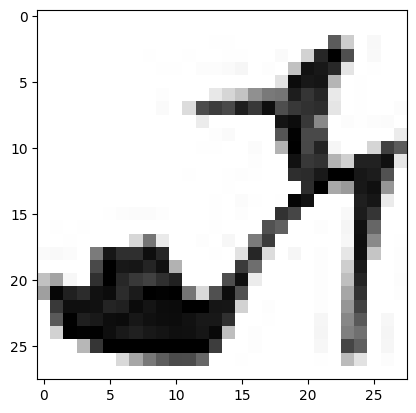

In [52]:
plt.imshow(train_images[9], cmap='binary') 

- Normalizing the images

In [53]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

2. Train a dense neural network using Keras (2 points)

- Flatten the images

In [54]:
train_images = train_images.reshape((60000, 784))
test_images = test_images.reshape((10000, 784))

- Build the Neural Network

In [55]:
model = Sequential([
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

- Compiling the Model

In [56]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- Training the Model

In [57]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.5522 - accuracy: 0.8108
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.4053 - accuracy: 0.8591
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3665 - accuracy: 0.8708
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3430 - accuracy: 0.8777
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3210 - accuracy: 0.8840


3. Evaluate its accuracy. Report accuracy, confusion metric, explore specific examples of incorrect classification, and drew some conclusions from this exploration (2 points)

In [58]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)
print("Test Loss", test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.3809 - accuracy: 0.8618
Test accuracy: 0.8618000149726868
Test Loss 0.38091492652893066


The test accuracy for the deep neural network was about 87.19%. The predictions made by the model for each of the classes in the fMNIST dataset are broken into sections in the confusion matrix. 

In [59]:
test_image_pred = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Prediction Labels

In [60]:
prediction_labels = np.argmax(test_image_pred, axis=1)
print(prediction_labels)

[9 2 1 ... 8 1 5]


Confusion Matrix:
[[830   0   3  14   3   1 136   0  13   0]
 [  3 963   0  25   3   0   4   0   2   0]
 [ 13   1 614  14 177   1 172   0   8   0]
 [ 50   7   3 874  25   1  35   0   5   0]
 [  0   1  39  41 820   0  93   0   6   0]
 [  0   0   0   1   0 965   0  23   1  10]
 [153   2  43  22  69   0 694   0  17   0]
 [  0   0   0   0   0  33   0 950   0  17]
 [  2   0   2   6   3   5   7   5 970   0]
 [  0   0   0   0   0  14   1  47   0 938]]


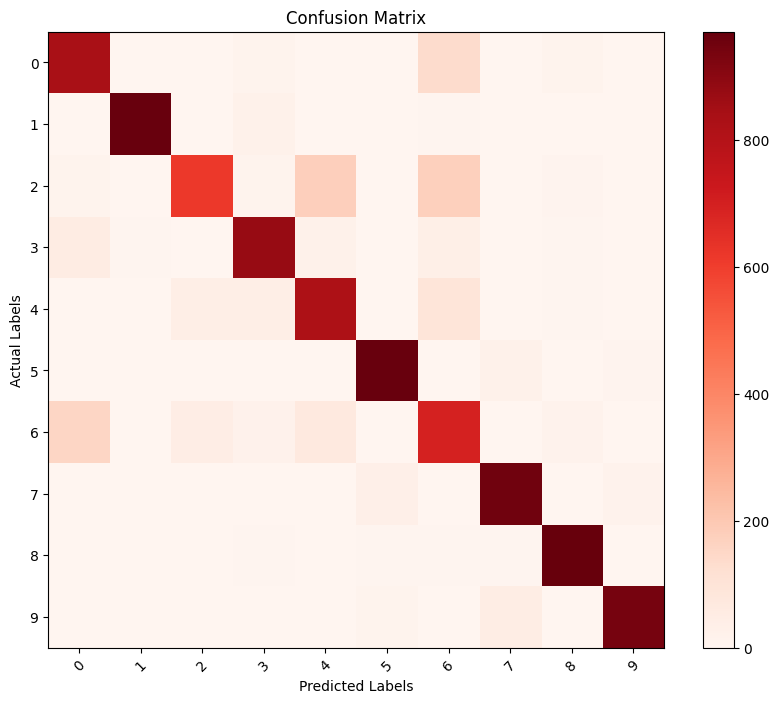

In [61]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_labels, prediction_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Create a heatmap of the confusion matrix
labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Reds')
plt.colorbar()
plt.xticks(np.arange(len(labels)), labels, rotation=45)
plt.yticks(np.arange(len(labels)), labels)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

- From the confusion matrix it can be ubderstood that the label 6 and label four have been experiencing one of the lowest accurat values, where there have been increased loss in terms of the accuracy that is achieved by the model. The label 6 stands for Shirt and label 4 stands for the coat. The decreased accuracy achieved in this stage can be  attributed to the lower quality of the images and the loss of detail that can be confusing to the model to detect the minute differences between these class of labels. 